
# Investigate U.S. Gun Sales and its relationship with population estimates

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### Datasets

The datasets selected for the analyses below include FBI NICS Firearm Background Check Data from 1998 to 2017 and U.S. census data in 2016.

#### Purpose

Estimate gross in-store gun sales in the U.S. from 1998 to 2017, compare number of gun sales by type, and determine relationships between gun sales and population variables such as population estimates, percentage of each race, number of housing units etc,.

#### Questions to be answered

<ul>
    <li>Do gun purchases vary by state, year and type?</li>
    <li>Is there a relationship between gun sales and population variables?</li>
</ul>

#### Notes on gun sale estimates

Based on <a href="http://www.smallarmssurvey.org/fileadmin/docs/F-Working-papers/SAS-WP14-US-Firearms-Industry.pdf">Small Arms Survey</a>, handgun and long gun sales can be reasonably estimated by NICS checks with 1.1x multiplier, and 2x multiplier for multiple guns sales (i.e. 1 check of handgun translates into 1.1 sales). Permit checks as well as other type of sales (pawn, redemption, return, private, other) have been omitted for this project.


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Gun Sale Data

In [34]:
gun_data = pd.read_excel('gun_data.xlsx')
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [35]:
gun_data.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


#### Observation
The dataframe is clean in regards to no unnecessary header and footer, columns are properly named. All columns other than month, state, handgun, long_gun and multiple need to be dropped since the project only concerns in-store sales.

In [36]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

#### Observation
Null values need to be dropped.

In [37]:
gun_data.duplicated().sum()

0

#### Observation
No duplicated data.

In [38]:
gun_data.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

#### Observation
Data types are usable, month as string values can be more easily sliced than if they were date values, 'multiple' column can be converted to float to keep it consistent to other columns.

### U.S. Census Data

In [39]:
demo_data = pd.read_csv('U.S. Census Data.csv')
demo_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [40]:
demo_data.tail()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
80,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
demo_data['Fact']

0          Population estimates, July 1, 2016,  (V2016)
1     Population estimates base, April 1, 2010,  (V2...
2     Population, percent change - April 1, 2010 (es...
3                     Population, Census, April 1, 2010
4     Persons under 5 years, percent, July 1, 2016, ...
5         Persons under 5 years, percent, April 1, 2010
6     Persons under 18 years, percent, July 1, 2016,...
7        Persons under 18 years, percent, April 1, 2010
8     Persons 65 years and over, percent,  July 1, 2...
9     Persons 65 years and over, percent, April 1, 2010
10     Female persons, percent,  July 1, 2016,  (V2016)
11               Female persons, percent, April 1, 2010
12         White alone, percent, July 1, 2016,  (V2016)
13    Black or African American alone, percent, July...
14    American Indian and Alaska Native alone, perce...
15         Asian alone, percent, July 1, 2016,  (V2016)
16    Native Hawaiian and Other Pacific Islander alo...
17    Two or More Races, percent, July 1, 2016, 

#### Observation
The dataframe has irrelevant rows that need to be removed, column 'Face Note' should be dropped, and column 'Fact' need to be trimmed down to short, descriptive names. Looking at the 'Fact' column, it appears only items containing 'July 1, 2016' would  be meaningfull for this project.

In [42]:
demo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

#### Observation
Null values can be dropped, but seeing as each state has 65 exact data points, it is possible that the null values come from the excessive rows. Once those rows are removed, there should be no null values.

In [43]:
demo_data.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
      ...  
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67     True
68    False
69    False
70     True
71    False
72    False
73    False
74    False
75     True
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83    False
84    False
Length: 85, dtype: bool

#### Observation
Duplicates can be cleaned once extra rows have been dropped, and 'Fact' column trimmed down to only include 'July 1, 2016'.

In [44]:
demo_data.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


#### Observation
All object types need to be converted to int or float.

<a id='cleaning'></a>
## Data Cleaning

### Gun Sale Data

In [45]:
# Create a set of column names to keep, drop the remainder
keep_col = ['month', 'state', 'handgun', 'long_gun', 'multiple']
gun_data = gun_data[keep_col]

# Drop null values
gun_data.dropna(inplace = True)

# Using multiple * 2 and handgun / long_gun * 1.1 as the sales volume, convert data types into float
gun_data['multiple'] = gun_data['multiple'].astype(float) * 2
gun_data['handgun'] = gun_data['handgun'] * 1.1
gun_data['long_gun'] = gun_data['long_gun'] * 1.1

# Create total column to account for total in-store sales (excluding permit, pawned, returned etc,.)
col = ['multiple', 'handgun', 'long_gun']
gun_data['total'] = gun_data.apply(lambda x: x[col].sum(), axis = 1)

# Create year column to assist in aggregate functions 
gun_data['year'] = gun_data['month'].str[:4]

gun_data.head()

,month,state,handgun,long_gun,multiple,total,year
0,2017-09,Alabama,6307.4,6952.0,634.0,13893.4,2017
1,2017-09,Alaska,2552.0,3223.0,320.0,6095.0,2017
2,2017-09,Arizona,12169.3,8740.6,1262.0,22171.9,2017
3,2017-09,Arkansas,4781.7,6669.3,732.0,12183.0,2017
4,2017-09,California,40881.5,27039.1,0.0,67920.6,2017


#### Observation
Dataframe trimmed down / cleaned correctly.

In [46]:
# Summarize data using year
gun_year = gun_data.groupby('year').sum()
gun_year

,handgun,long_gun,multiple,total
year,,,,
1998,241998.9,641070.1,17440.0,900509.0
1999,2790411.8,5739196.1,207486.0,8737093.9
2000,2411066.9,5257975.8,191554.0,7860596.7
2001,2383934.3,5437712.5,194264.0,8015910.8
2002,2029623.2,4850242.1,186138.0,7066003.3
2003,2036185.8,4821362.7,198472.0,7056020.5
2004,2189506.0,4957531.7,203970.0,7351007.7
2005,2465914.0,5042907.1,219500.0,7728321.1
2006,2685457.5,5268550.1,260234.0,8214241.6


In [47]:
# Summarize data using state
gun_state = gun_data.groupby('state').sum()
gun_state

,handgun,long_gun,multiple,total
state,,,,
Alabama,2444240.7,2888631.9,210460.0,5543332.6
Alaska,478062.2,629391.4,57808.0,1165261.6
Arizona,1959614.8,1628838.2,169958.0,3758411.0
Arkansas,1062142.4,1829581.6,123838.0,3015562.0
California,6501968.0,6530447.0,415728.0,13448143.0
Colorado,2781264.2,2998636.3,613742.0,6393642.5
Connecticut,967186.0,701905.6,16048.0,1685139.6
Delaware,228919.9,266458.5,16538.0,511916.4
District of Columbia,5027.0,665.5,80.0,5772.5


In [48]:
# Summarize data using type
gun_type = pd.DataFrame(gun_data.iloc[:, 2:-2].sum(axis = 0), columns = ['total_by_type'])
gun_type = gun_type.sort_values(by = 'total_by_type', ascending=False)
gun_type

,total_by_type
long_gun,107107027.5
handgun,81458391.3
multiple,6707026.0


In [49]:
# Extract only 2016 data to enable merging with census data
gun_16 = gun_data[gun_data['year'] == '2016'].groupby(['year', 'state'], as_index=False).sum()
gun_16

,year,state,handgun,long_gun,multiple,total
0,2016,Alabama,168435.3,134159.3,13090.0,315684.6
1,2016,Alaska,41240.1,40575.7,4632.0,86447.8
2,2016,Arizona,183462.4,119886.8,15816.0,319165.2
3,2016,Arkansas,88268.4,90332.0,8800.0,187400.4
4,2016,California,616390.5,610005.0,0.0,1226395.5
5,2016,Colorado,266752.2,198028.6,28586.0,493366.8
6,2016,Connecticut,134612.5,48194.3,0.0,182806.8
7,2016,Delaware,28131.4,23920.6,2068.0,54120.0
8,2016,District of Columbia,742.5,52.8,16.0,811.3
9,2016,Florida,728538.8,347855.2,50284.0,1126678.0


### U.S. Census Data

In [50]:
# Remove unnecessary rows at the bottom
demo_data = demo_data.iloc[:64, :]

# Drop 'Fact Note' column
demo_data.drop(['Fact Note'], axis = 1, inplace=True)

# Extract only rows pertaining to 'July 1, 2016'
demo_16 = demo_data[demo_data['Fact'].str.contains('July 1, 2016')]

# Transpose dataframe to enable merging with Gun Sale data
demo_16 = demo_16.rename(columns={'Fact': 'state'})
demo_16 = demo_16.set_index('state')
demo_16 = demo_16.T

# Clean up column names to be short and descriptive
for col in demo_16.columns:
    demo_16 = demo_16.rename(columns={col: col.split(",")[0]})

# After cleaning, 2 columns share the same name "White only", drop one of them
demo_16 = demo_16.loc[:, ~demo_16.columns.duplicated()]

# Cleaned-up dataframe does not have null values, but "Z" appears in some of the values in the particular column
demo_16['Native Hawaiian and Other Pacific Islander alone'] = demo_16['Native Hawaiian and Other Pacific Islander alone'].apply(lambda x: '0.00%' if 'Z' in x else x)

# Convert strings "0.00%" to float by removing "." and "%", then divided by 100
# Population estimates and housing units are converted to int, remaining columns are converted to float
for col in demo_16.columns[[0,-1]]:
    demo_16[col] = demo_16[col].apply(lambda x: int(x.replace(",","")))

for col in demo_16.columns[1:-1]:
    demo_16[col] = demo_16[col].apply(lambda x: float(x.strip("%"))/100)

# Population variables are converted from percentage of population estimates to actual numbers
for col in demo_16.columns[2:-1]:
    demo_16[col] = demo_16[col]*demo_16['Population estimates']
    demo_16[col] = demo_16[col].apply(lambda x: int(x))
        
demo_16 = demo_16.rename(columns={'Population': 'Population percent change'})

In [51]:
merge_data = pd.merge(gun_16,demo_16, how='inner', left_on='state', right_index=True)
merge_data

,year,state,handgun,long_gun,multiple,total,Population estimates,Population percent change,Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Two or More Races,Hispanic or Latino,Housing units
0,2016,Alabama,168435.3,134159.3,13090.0,315684.6,4863300,0.01700,291798,1099105,782991,2509462,3370266,1303364,34043,68086,4863,77812,204258,2230185
1,2016,Alaska,41240.1,40575.7,4632.0,86447.8,741894,0.04500,54158,186957,77156,353883,490391,28191,112767,46739,9644,54158,51932,310658
2,2016,Arizona,183462.4,119886.8,15816.0,319165.2,6931071,0.08400,436657,1628801,1171350,3486328,5773582,339622,374277,235656,20793,194069,2141700,2961003
3,2016,Arkansas,88268.4,90332.0,8800.0,187400.4,2988248,0.02500,191247,705226,487084,1521018,2372668,469154,29882,47811,8964,59764,218142,1354762
4,2016,California,616390.5,610005.0,0.0,1226395.5,39250017,0.05400,2472751,9106003,5338002,19742758,28534762,2551251,667250,5809002,196250,1491500,15268256,14060525
5,2016,Colorado,266752.2,198028.6,28586.0,493366.8,5540545,0.10200,337973,1263244,742433,2753650,4847976,249324,88648,182837,11081,166216,1180136,2339118
6,2016,Connecticut,134612.5,48194.3,0.0,182806.8,3576452,0.00100,185975,754631,575808,1831143,2882620,422021,17882,168093,3576,82258,561502,1499116
7,2016,Delaware,28131.4,23920.6,2068.0,54120.0,952065,0.06000,55219,204693,166611,491265,667397,215166,5712,38082,952,24753,87589,426149
9,2016,Florida,728538.8,347855.2,50284.0,1126678.0,20612439,0.09600,1133684,4143100,4101875,10532956,15995252,3462889,103062,597760,20612,432861,5132497,9301642
10,2016,Georgia,214280.0,141104.7,14956.0,370340.7,10310371,0.06400,659863,2515730,1350658,5289220,6309947,3299318,51551,422725,10310,216517,969174,4218776


#### Observation
Dataframe merged correctly with states.

<a id='eda'></a>
## Exploratory Data Analysis

### Do gun purchases vary by state, year and type?

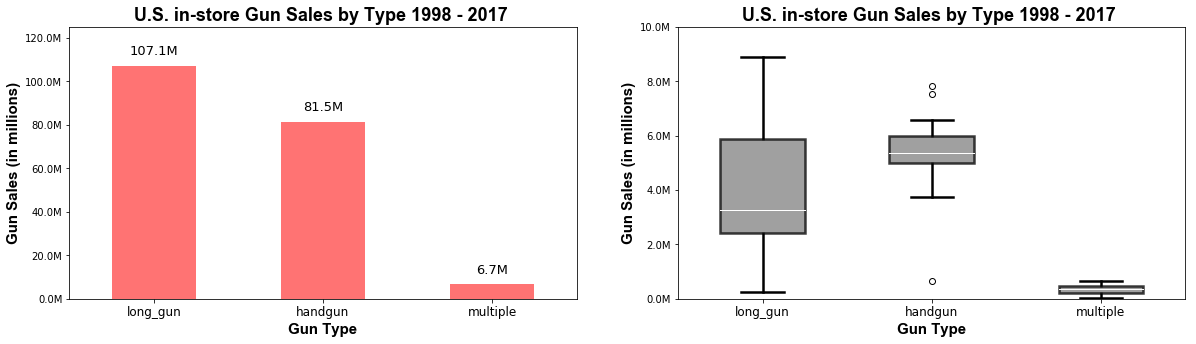

In [52]:
# Create side by side subplots to show gun sale by type in gross amount and distribution
fig, (ax1, ax2)= plt.subplots(1, 2, figsize = (20, 5), sharex=True)
axs = [ax1, ax2]
ax = plt.gca()

# Create a bar graph to compare gun sales by type in gross dollar amount
bar_one = ax1.bar(range(1,4), gun_type['total_by_type'].values, color = 'r', alpha = 0.55, width = 0.5)

# Create a box plot to compare gun sales by type in distribution of data points (max, min, mean, etc,.)
box_one = ax2.boxplot(gun_year.iloc[:, 0:3].values, widths = 0.5, patch_artist=True)

# Change boxplot style metrics
for element in ['medians']:
    plt.setp(box_one[element], color='w')

for element in ['boxes', 'whiskers', 'caps']:
    plt.setp(box_one[element], color='black', linewidth = 2.5)
    
for patch in box_one['boxes']:
    patch.set(facecolor='grey', alpha = 0.75) 

# Set font to 'Arial', format y axis into '0.0M'
font = {'fontname':'Arial'}
fmt = lambda x, y: ('%1.1fM' % (x*1e-6))
tick = ticker.FuncFormatter(fmt)

# Add ticks, axis labels, title, etc,.
for i in range(0,len(axs)):
    axs[i].set_xticks(range(1,4))
    axs[i].set_xticklabels(gun_type.index, size = 12)
    axs[i].set_title('U.S. in-store Gun Sales by Type 1998 - 2017 ', size = 18, **font, fontweight='bold')
    axs[i].set_xlabel('Gun Type', size = 15, **font, fontweight='bold')
    axs[i].set_ylabel('Gun Sales (in millions)', size = 15, **font, fontweight='bold')
    axs[i].yaxis.set_major_formatter(tick) 

ax1.set_ylim([0, 125000000])
ax2.set_ylim([0, 10000000])


# Add data labels to bar graph
for i in range(0, len(bar_one)):
    ax1.text(bar_one[i].get_x() + bar_one[i].get_width()/2, bar_one[i].get_height() + 5e6, 
                str('{:.1f}M'.format(bar_one[i].get_height()/1e6)), ha='center', color='black', fontsize=13)

plt.show()

#### Observation

Long gun generated the most sales over the period, followed by handgun sales. Handgun sales produce visible outliers, which could indicate significant fluctuations in demand at certain time points. 

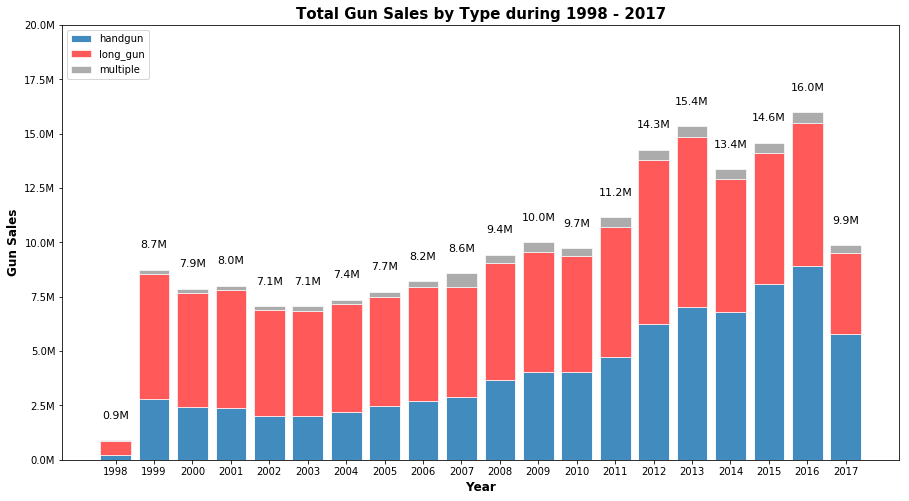

In [53]:
plt.figure(figsize = (15,8))
ax = plt.gca()

# Create stacked bar to differentiate gun sales by type for each year
bars_h = plt.bar(range(len(gun_year.index)), gun_year['handgun'].values, width = 0.8, color='#1F77B4', 
                 edgecolor = 'white', alpha = 0.85, label = 'handgun')
bars_l = plt.bar(range(len(gun_year.index)), gun_year['long_gun'].values, width = 0.8, 
        bottom=gun_year['handgun'].values, color='r', alpha = 0.65, edgecolor = 'white', label = 'long_gun')
bars_m = plt.bar(range(len(gun_year.index)), gun_year['multiple'].values, width = 0.8, label = 'multiple',
        bottom=gun_year['long_gun'].values + gun_year['handgun'].values, color='grey', edgecolor = 'white', alpha = 0.65)

plt.xticks(range(len(gun_year.index)), gun_year.index)
ax.yaxis.set_major_formatter(tick) 
ax.set_ylim([0, 20000000])

# Place data labels on top of the stacked bars to indicate total gross sales
tem = []
for bar_h, bar_l, bar_m in zip(bars_h, bars_l, bars_m):
    ax.text(bar_h.get_x() + bar_h.get_width()/2, bar_h.get_height() + bar_l.get_height() + bar_m.get_height() + 1e6, 
            str('{:.1f}M'.format((bar_h.get_height() + bar_l.get_height() + bar_m.get_height())/1e6)), 
                 ha='center', color='black', fontsize=11)

plt.title("Total Gun Sales by Type during 1998 - 2017", size = 15, fontweight = "bold")
plt.xlabel("Year", size = 12, fontweight = "bold")
plt.ylabel("Gun Sales", size = 12, fontweight = "bold")

plt.legend(loc=2)
plt.show()

#### Observation

Total gun sales exhibit a generally upward trend, despite some fluctuations. Significant dip in gun sales is present in 2017, down approximately 6 million from the previous year's 16 million, which was also the greatest gun sales during 1998 - 2017.

In [54]:
# Mariana Islands are put into placeholder key 'OTH', which stands for 'other'.
states = {'OH': 'Ohio', 'KY': 'Kentucky', 'AS': 'American Samoa', 'NV': 'Nevada', 'WY': 'Wyoming', 'NA': 'National', 
          'AL': 'Alabama', 'MD': 'Maryland', 'AK': 'Alaska', 'UT': 'Utah', 'OR': 'Oregon', 'MT': 'Montana', 
          'IL': 'Illinois', 'TN': 'Tennessee', 'DC': 'District of Columbia', 'VT': 'Vermont', 'ID': 'Idaho', 
          'AR': 'Arkansas', 'ME': 'Maine', 'WA': 'Washington', 'HI': 'Hawaii', 'WI': 'Wisconsin', 'MI': 'Michigan', 
          'IN': 'Indiana', 'NJ': 'New Jersey', 'AZ': 'Arizona', 'GU': 'Guam', 'MS': 'Mississippi', 'PR': 'Puerto Rico',
          'NC': 'North Carolina', 'TX': 'Texas', 'SD': 'South Dakota', 'MP': 'Northern Mariana Islands', 'IA': 'Iowa',
          'MO': 'Missouri', 'CT': 'Connecticut', 'WV': 'West Virginia', 'SC': 'South Carolina', 'LA': 'Louisiana', 
          'KS': 'Kansas', 'NY': 'New York', 'NE': 'Nebraska', 'OK': 'Oklahoma', 'FL': 'Florida', 'CA': 'California', 
          'CO': 'Colorado', 'PA': 'Pennsylvania', 'DE': 'Delaware', 'NM': 'New Mexico', 'RI': 'Rhode Island', 
          'MN': 'Minnesota', 'VI': 'Virgin Islands', 'NH': 'New Hampshire', 'MA': 'Massachusetts', 'GA': 'Georgia', 
          'ND': 'North Dakota', 'VA': 'Virginia', 'OTH': 'Mariana Islands'}
state = {val: key for key, val in states.items()}

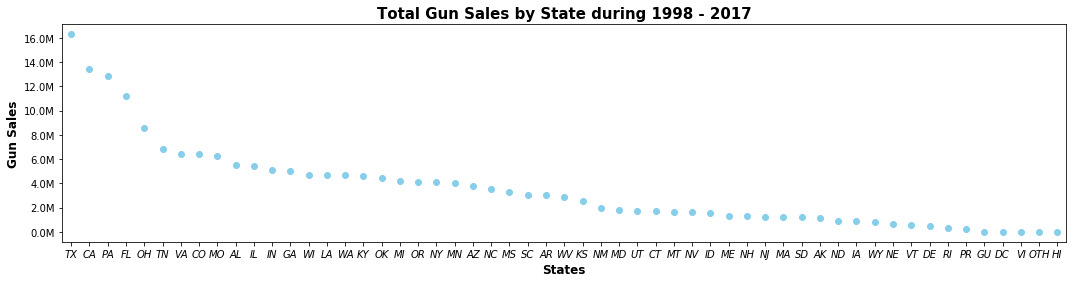

In [55]:
plt.figure(figsize = (18,4))
ax = plt.gca()

# Sort total gun sales by state
sort_state = gun_state.sort_values('total', ascending = False)
sort_state = sort_state.reset_index()
sort_state['state'] = sort_state['state'].apply(lambda x: state[x])

# Plot total gun sales by state in descending order
plt.plot(range(len(sort_state.index)), sort_state['total'].values, 'o', color = 'skyblue')
plt.xticks(range(len(sort_state.index)), sort_state['state'], style="italic")
ax.yaxis.set_major_formatter(tick) 
ax.set_xlim([-0.5, len(sort_state.index)-0.5])
plt.title("Total Gun Sales by State during 1998 - 2017", size = 15, fontweight = "bold")
plt.xlabel("States", size = 12, fontweight = "bold")
plt.ylabel("Gun Sales", size = 12, fontweight = "bold")

plt.show()

#### Observation

Texas, California, Pennsylvania, Florida and Ohio appear to have generated the most gun sales.

### Is there a relationship between gun sales and population variables?

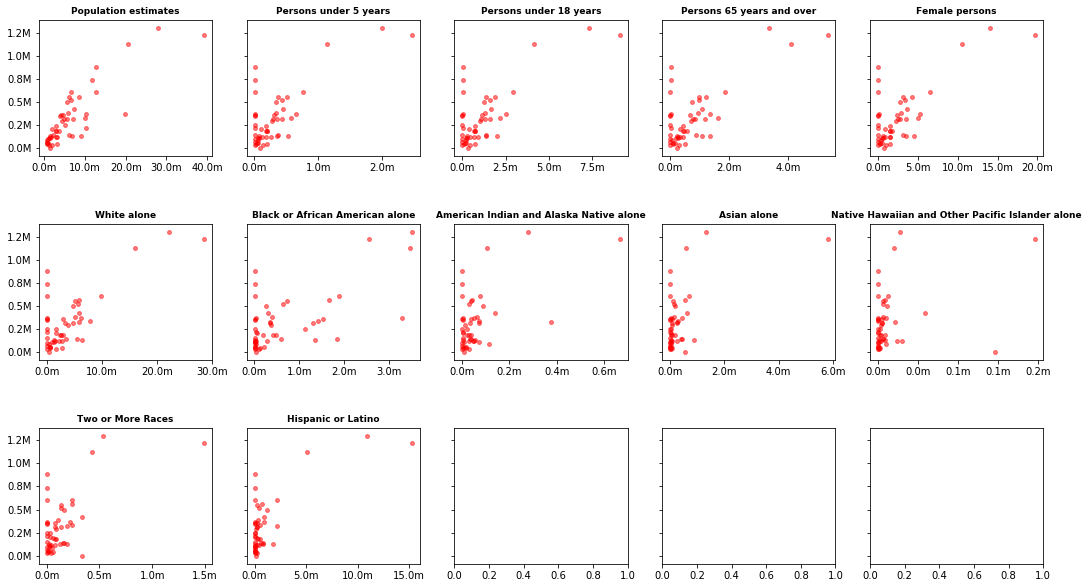

In [56]:
# Create subplots to display relationships between all population variables and total gun sales
fig, ((ax1, ax2, ax3, ax4, ax5),(ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15)) = plt.subplots(3, 5, figsize = (18,10), sharey=True)
axs = [ax1, ax2, ax3, ax4, ax5,ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14, ax15]
fig.subplots_adjust(left= None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

# Exclude 'Population percent change' from the comparison
target_col = merge_data.columns[6:-1]
target_col = target_col[target_col != 'Population percent change']
target_col

fmt_y = lambda x, y: ('%1.1fm' % (x*1e-6))
tick_y = ticker.FuncFormatter(fmt_y)

for i, n in enumerate(target_col.values):
    axs[i].scatter(x = merge_data[n].values, y = merge_data['total'].values, s = 15, alpha = 0.5, c = 'r')
    axs[i].set_title(n, fontweight='bold', size = 9)
    axs[i].yaxis.set_major_formatter(tick) 
    axs[i].xaxis.set_major_formatter(tick_y) 

#### Observation

Total gun sales appears to have a positive correlation with population estimates and housing units, though not strong. Reading the graphs above, Asians alone, Native Hawaiian and Other Pacific Islander alone, and hispanic or Latino have the weakest correlation with total gun sales. 

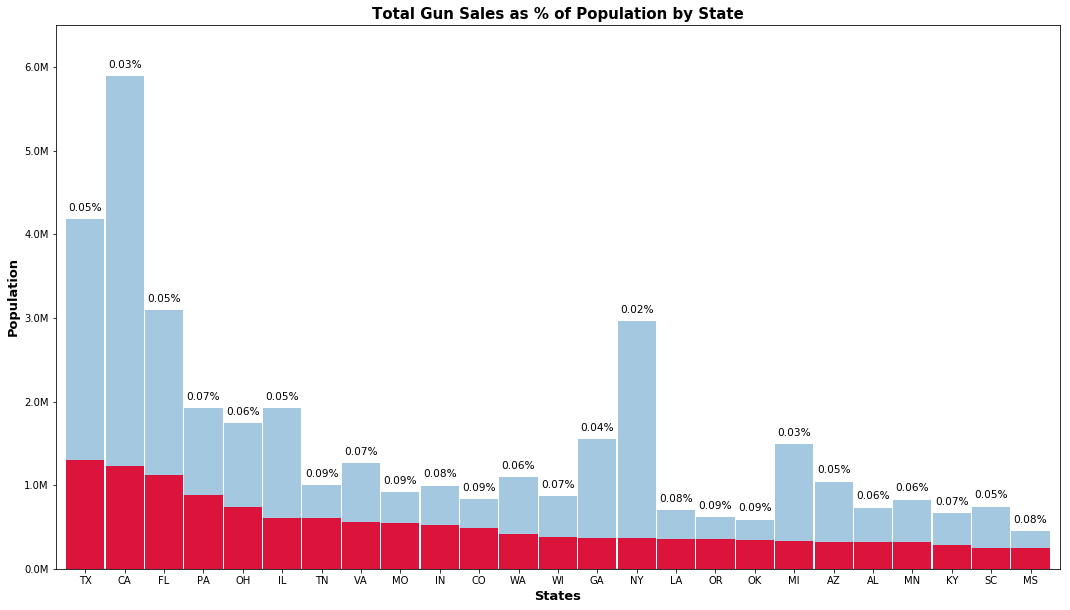

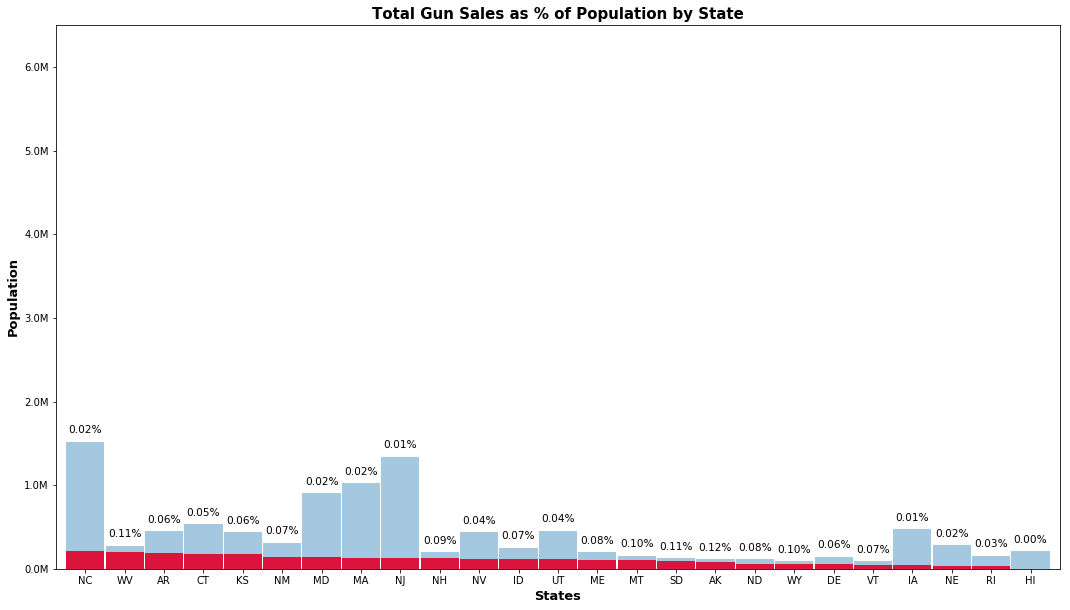

In [57]:
# Create a new column to calculate total gun sales as a percentage of population
merge_data['Gun Sale as percentage of population'] = merge_data['total'] / merge_data['Population estimates']

# Sort values by total gun sales
percent_change = merge_data.loc[:, ['state','Population estimates','total', 'Gun Sale as percentage of population']].sort_values(by = 'total', ascending = False)

# Convert state names to abbreviations in order to not crowd x axis labels
percent_change['state'] = percent_change['state'].apply(lambda x: state[x])

# ***** PLEASE NOTICE HERE ***** since total gun sales as a percentage of population return very small numbers
# Here the population is reduced to 15% of population so that the stacked bars become more illustrative
percent_change['diff'] = percent_change['Population estimates']*0.15 - percent_change['total']
percent_change = percent_change.set_index('state')

# Slice the dataframe by half to avoid crowded x axis
percent_1h = percent_change.iloc[:25,:]
percent_2h = percent_change.iloc[25:,:]

# Use a function to avoid repetitive codes for plotting 2 slices of the same dataframe
def make_chart(df):
    plt.figure(figsize = (18,10))
    ax = plt.gca()
    
    bars_gun = plt.bar(range(len(df.index)),df['total'].values, color = 'crimson', width = 0.97)
    bars_diff = plt.bar(range(len(df.index)),df['diff'].values, bottom=df['total'],
                       alpha = 0.4, width = 0.97)
    
    # Plot the percentage as white, 100% transparent series to use its data labels
    bars_perc = plt.bar(range(len(df.index)),df['Gun Sale as percentage of population'].values, 
                        color = 'w', alpha = 0)
    
    # Show only data labels for total gun sales as percentage of population
    for bar, bar_d, bar_p in zip(bars_gun, bars_diff, bars_perc):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + bar_d.get_height() + 1e5, str('{:.2f}%'.format(bar_p.get_height())),
               ha='center', color='black', fontsize=10.5)
        
    plt.xticks(range(len(df.index)), df.index)
    ax.set_xlim([-0.75, len(df.index)-0.25])
    ax.set_ylim([-0.75, 6500000])

    plt.title("Total Gun Sales as % of Population by State", size = 15, fontweight = "bold")
    plt.xlabel("States", size = 13, fontweight = "bold")
    plt.ylabel("Population", size = 13, fontweight = "bold")
    ax.yaxis.set_major_formatter(tick) 
    
    return plt.show()

make_chart(percent_1h)
make_chart(percent_2h)

#### Observation

It appears that total gun sales do exhibit some correlational relationship with population estimates; however, the states with the highest population estimates do not necessarily have the most total gun sales.

In [58]:
# Summary Statistics of Data
merge_data.describe()

,handgun,long_gun,multiple,total,Population estimates,Population percent change,Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Two or More Races,Hispanic or Latino,Housing units,Gun Sale as percentage of population
count,50.000000,50.000000,50.000000,5.000000e+01,5.000000e+01,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,5.000000e+01,50.00000,5.000000e+01,50.000000,5.000000e+01,5.000000e+01,5.000000e+01,50.000000
mean,177551.638000,131676.908000,10294.720000,3.195233e+05,6.448927e+06,0.031207,3.043907e+05,1.128826e+06,7.326577e+05,2.477504e+06,3.770377e+06,6.199245e+05,56150.26000,2.999251e+05,13346.300000,1.304729e+05,9.739845e+05,2.707684e+06,0.060184
std,185945.395696,118931.726762,13047.318153,3.026250e+05,7.271769e+06,0.033669,4.655571e+05,1.711603e+06,1.040653e+06,3.661885e+06,5.456319e+06,9.458575e+05,111076.04314,8.409595e+05,34530.646788,2.296473e+05,2.673850e+06,2.813244e+06,0.028694
min,0.000000,0.000000,0.000000,0.000000e+00,5.855010e+05,-0.012000,5.490000e+02,1.766000e+03,1.099000e+03,3.691000e+03,6.662000e+03,1.730000e+02,105.00000,1.130000e+02,0.000000,1.590000e+02,2.720000e+02,2.706000e+05,0.000000
25%,51416.750000,49726.325000,1813.500000,1.148364e+05,1.850106e+06,0.000692,3.246800e+04,1.236948e+05,7.982325e+04,2.937428e+05,3.990230e+05,1.492075e+04,3622.25000,9.065500e+03,118.750000,1.197400e+04,2.284375e+04,8.420270e+05,0.038424
50%,132783.750000,99129.250000,5490.000000,2.310373e+05,4.559320e+06,0.020500,1.871320e+05,7.102095e+05,4.385505e+05,1.491771e+06,2.290326e+06,1.977085e+05,28290.50000,6.732000e+04,3471.000000,6.733500e+04,2.041595e+05,2.001266e+06,0.063000
75%,211942.500000,175310.575000,14688.500000,3.788890e+05,7.198768e+06,0.050750,3.655082e+05,1.368905e+06,9.683225e+05,3.103699e+06,5.066124e+06,7.000820e+05,53137.25000,2.668040e+05,8959.000000,1.638295e+05,5.825838e+05,3.009514e+06,0.081355
max,728538.800000,610005.000000,66204.000000,1.297198e+06,3.925002e+07,0.108000,2.472751e+06,9.106003e+06,5.338002e+06,1.974276e+07,2.853476e+07,3.510687e+06,667250.00000,5.809002e+06,196250.000000,1.491500e+06,1.526826e+07,1.406052e+07,0.116523


<a id='conclusions'></a>
## Conclusions

<ul>
<li>Total gun sales are composed by three categories: handgun, long gun, and multiple guns. Long gun seems to be the most popular option as its estimated sales volume is highest amongst the three. </li>

<li>During 1998 - 2017, growth of total gun sales appear to be relatively consistent despite some spikes; however, gun sales in 2017 dropped sharply down to levels several years ago. </li>

<li>Total gun sales also exhibit some difference by state: Texas has the highest gun sales, and Hawaii has the lowest.</li>

<li>Total gun sales appears to have a positive correlation with population estimates and housing units; however, housing units may also have a positive correlation with population estimates, it is difficult to draw conclusion on the relationship between total gun sales and housing units.</li>

<li>Despite the indicated correlation, states that have the most gun sales do not all have the highest population estimates.</li>
</ul>